<a href="https://colab.research.google.com/github/venkateshblks/Clustering/blob/main/EastWestAirlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
Draw the inferences from the clusters obtained.**

Data Description:

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
data['ID#'].nunique()

3999

In [7]:
data.drop(columns='ID#', inplace=True)

In [8]:
data.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


# Hierarchical clustering

In [9]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
min_max_scaler = MinMaxScaler()
norm = min_max_scaler.fit_transform(data)
norm

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [10]:
len(norm)

3999

In [11]:
# create dendrogram
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

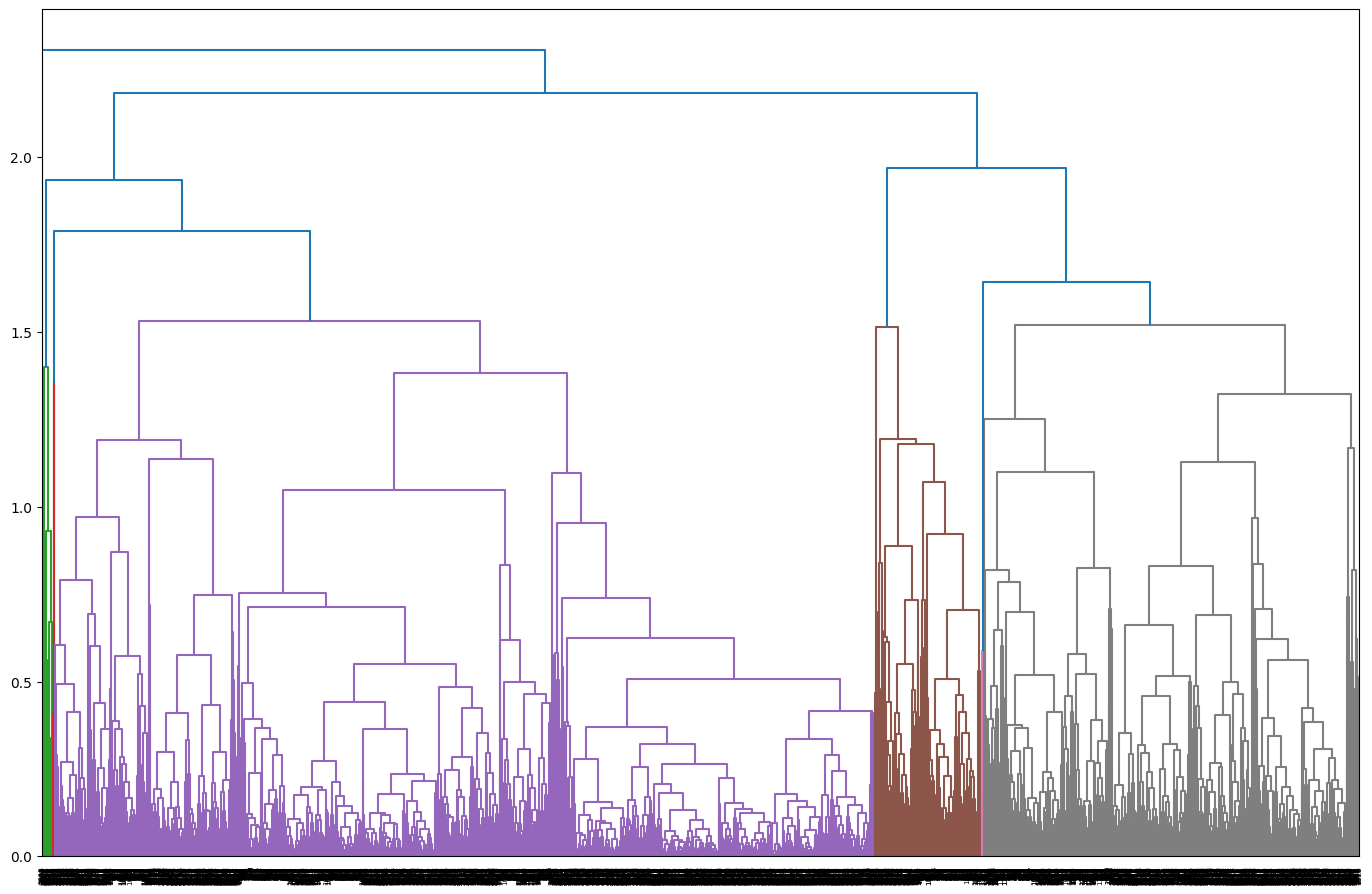

In [12]:
plt.figure(figsize = (17, 11))
dendrogram=sch.dendrogram(sch.linkage(norm, method='complete'))

In [13]:
# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [14]:
y_hc = hc.fit_predict(norm)
y_hc

array([0, 0, 0, ..., 2, 0, 0])

In [15]:
hc.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [16]:
data['h_clusterid'] = hc.labels_

In [17]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [18]:
data.h_clusterid.value_counts()

0    2495
2    1144
1     325
4      31
3       4
Name: h_clusterid, dtype: int64

In [19]:
data.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
2485,23649,0,1,1,1,3250,16,0,0,3176,0,0
2487,169794,0,3,1,1,22824,19,767,2,3119,0,0
2488,23781,0,1,1,1,50,1,50,1,3085,0,0
2491,5970,0,1,1,1,1000,1,0,0,3091,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
940,44824,0,1,3,1,21107,19,2000,4,5916,1,4
3959,13942,0,1,2,1,5822,12,0,0,1458,0,4
3779,35850,0,1,3,1,17759,18,0,0,3439,0,4
1389,49145,0,1,2,1,12755,22,2450,7,5323,0,4


In [20]:
data[data.h_clusterid==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
2015,53232,888,4,1,1,80696,65,22100,45,3831,1,3
3235,287033,0,1,1,1,26161,58,12873,53,2272,1,3
3583,160114,500,1,1,1,71954,86,30817,53,1373,1,3
3594,27619,0,4,1,1,83726,68,14050,46,1325,1,3


In [21]:
data.groupby('h_clusterid').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid,,,,,,,,,,,
0,59968.433667,88.883768,1.712224,1.000401,1.011222,10271.530261,9.105812,227.797194,0.656112,3825.392786,0.000802
1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548


# K-means

In [22]:
data2=data.drop(columns='h_clusterid')
data2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [23]:
from sklearn.cluster import KMeans
scaler = StandardScaler().fit_transform(data2)
scaler

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

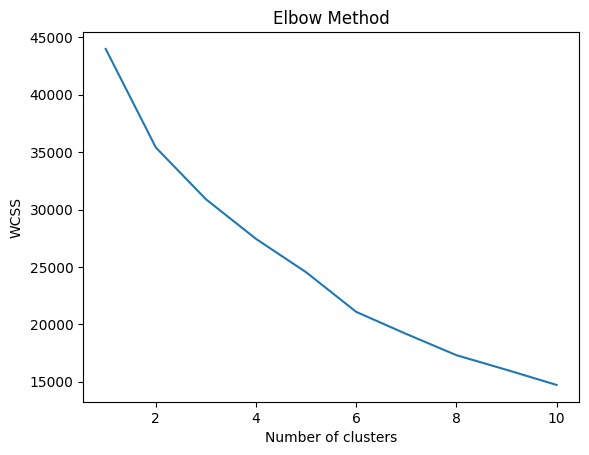

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
wcss

[43989.000000000015,
 35409.511452424376,
 30899.24682465222,
 27446.372456681347,
 24541.329582045757,
 21089.973628929638,
 19165.86145865565,
 17316.866446128264,
 16043.406242309495,
 14726.983322766802]

In [26]:
clusters = KMeans(6, random_state=42)
clusters.fit(scaler)
clusters.labels_

array([2, 2, 2, ..., 0, 2, 2], dtype=int32)

In [27]:
clusters.fit_predict(scaler)

array([2, 2, 2, ..., 0, 2, 2], dtype=int32)

In [28]:
clusters.inertia_

21089.75687002388

In [29]:
from sklearn.metrics import silhouette_score
silhouette_score(data2, clusters.labels_)

0.11304164326909422

In [30]:
c2=KMeans(2, random_state=41)
c2.fit(scaler)


KMeans(n_clusters=2, random_state=41)

In [31]:
silhouette_score(data2, c2.labels_)

0.34333332585159393

In [32]:
data2['clusterid']=clusters.labels_
data2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [33]:
data2['clusterid'].value_counts()

2    2483
0    1254
1     143
4      61
5      43
3      15
Name: clusterid, dtype: int64

In [34]:
data2.groupby('clusterid').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusterid,,,,,,,,,,,
0,117252.014354,60.495215,3.704944,1.000000,1.001595,39256.378788,18.760766,347.125997,1.037480,4896.791866,0.649123
1,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
2,43519.741845,42.457511,1.226742,1.000000,1.000403,4605.759162,6.825614,198.250503,0.616593,3696.446234,0.198953
3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377
5,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


#DBSCAN

In [35]:
from sklearn.cluster import DBSCAN

In [36]:
dbscan = DBSCAN(eps=1, min_samples=7)
dbscan.fit(scaler)
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [37]:
data3=data.drop(columns='h_clusterid')
data3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [38]:
data3['clusterId']=dbscan.labels_
data3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterId
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [39]:
data3['clusterId'].value_counts()

 0    2299
 1    1072
-1     604
 2      11
 4       8
 3       5
Name: clusterId, dtype: int64

In [40]:
data3.groupby('clusterId').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusterId,,,,,,,,,,,
-1,177887.369205,896.723510,2.690397,1.077815,1.081126,38686.490066,21.649007,2103.266556,6.089404,4741.235099,0.677152
0,52733.796433,3.679426,1.656807,1.000000,1.000000,9001.937364,8.428882,113.070465,0.373206,3791.968247,0.000000
1,60530.977612,6.554104,2.591418,1.000000,1.000000,22723.841418,12.793843,268.355410,0.840485,4503.971082,1.000000
2,28365.363636,0.000000,1.000000,2.000000,1.000000,8825.272727,11.818182,22.727273,0.181818,2702.000000,0.000000
3,51030.000000,0.000000,1.000000,1.000000,1.000000,4737.600000,11.400000,4242.800000,10.400000,2871.600000,0.000000
4,24545.375000,2401.000000,1.000000,1.000000,1.000000,2427.750000,5.000000,37.500000,0.250000,2042.625000,0.000000
